## Objective

Redefine ImSig using single cell data

### Load packages

In [1]:
import pandas as pd
import numpy as np
import os
import magic

# Plotting and miscellaneous imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
# Guide
# http://nbviewer.jupyter.org/github/pkathail/magic/blob/develop/notebooks/Magic_single_cell_RNAseq.ipynb

ModuleNotFoundError: No module named 'magic'

### Import data

In [31]:
# Set Working directory
WD = 'L:/Extended M drive/ImSIg/Single cell validation/melanoama'
os.chdir(WD)
# Import data
mel = np.transpose(pd.read_csv('melanoma_expression.csv', index_col=0))
mel_sc = magic.mg.SCData(mel, 'sc-seq')

In [39]:
mel_sc

Exception: cannot handle a non-unique multi-index!

In [6]:
# Run MAGIC
mel_sc.run_magic(n_pca_components=100, random_pca=True, t=6, k=30, 
                 ka=10, epsilon=1, rescale_percent=99)

doing PCA
Computing distances
Autotuning distances
Computing kernel
MAGIC: W_t = W^t
MAGIC: data_new = W_t * data


C:\Anaconda3\lib\site-packages\magic-0.0-py3.6.egg\magic\MAGIC_core.py:78: RuntimeWarning: invalid value encountered in true_divide


In [8]:
# Output imputed file
mat = np.transpose(mel_sc.magic.data)
mat = mat.round(2)
mat.head(5)

,Cy72_CD45_H02_S758_comb,CY58_1_CD45_B02_S974_comb,Cy71_CD45_D08_S524_comb,Cy81_FNA_CD45_B01_S301_comb,Cy80_II_CD45_B07_S883_comb,Cy81_Bulk_CD45_B10_S118_comb,Cy72_CD45_D09_S717_comb,Cy74_CD45_A03_S387_comb,Cy71_CD45_B05_S497_comb,Cy80_II_CD45_C09_S897_comb,...,CY75_1_CD45_CD8_7__S265_comb,CY75_1_CD45_CD8_3__S127_comb,CY75_1_CD45_CD8_1__S61_comb,CY75_1_CD45_CD8_1__S12_comb,CY75_1_CD45_CD8_1__S25_comb,CY75_1_CD45_CD8_7__S223_comb,CY75_1_CD45_CD8_1__S65_comb,CY75_1_CD45_CD8_1__S93_comb,CY75_1_CD45_CD8_1__S76_comb,CY75_1_CD45_CD8_7__S274_comb
MAGIC C9orf152,0.22,0.25,0.03,0.02,0.25,0.02,0.32,0.19,0.02,0.25,...,2.37,0.21,0.16,0.17,0.15,0.23,0.18,0.15,0.18,0.16
MAGIC RPS11,9.75,8.82,9.78,8.64,8.43,8.66,9.33,8.74,9.77,8.44,...,7.75,8.22,6.96,7.26,7.25,7.01,7.68,7.04,7.79,7.06
MAGIC ELMO2,1.01,3.06,3.10,4.75,5.61,4.79,2.13,3.24,3.23,5.58,...,3.05,3.77,5.39,5.26,5.23,5.21,4.61,5.31,4.17,5.36
MAGIC CREB3L1,0.00,0.01,0.05,0.01,0.04,0.01,0.01,0.01,0.06,0.04,...,0.03,0.01,0.03,0.03,0.03,0.03,0.02,0.03,0.02,0.03
MAGIC PNMA1,0.25,1.14,1.68,1.93,1.95,1.93,0.90,1.20,1.80,1.90,...,1.20,1.34,2.02,1.84,1.89,1.93,1.59,1.93,1.52,1.96


In [13]:
result = mat.join(pd.DataFrame(mat.sum(axis=1)))
result1 = result[(result[0] > 0)]
result1.shape
result1.to_csv('mel_magic_zero_removed.csv')

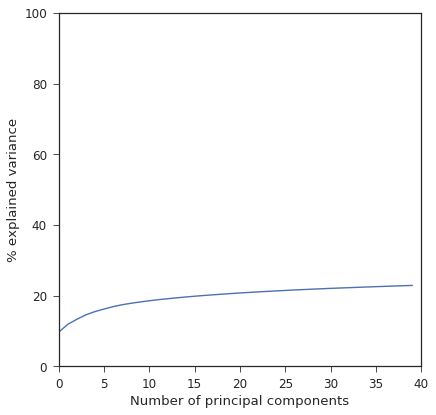

In [55]:
fig, ax = mel_sc.plot_pca_variance_explained(n_components=40, random=True)

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:196: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


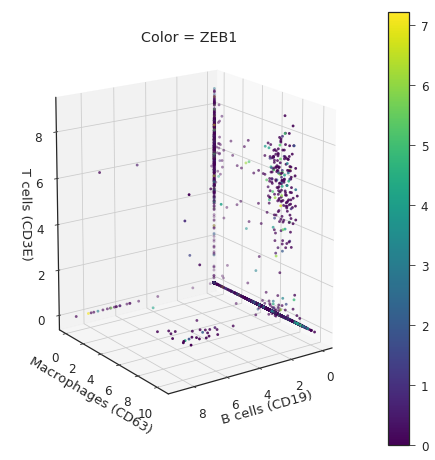

In [25]:
# Before Magic
fig, ax = hnsc_sc.scatter_gene_expression(['CD19', 'CD63', 'CD3E'], color='ZEB1')
ax.set_xlabel('B cells (CD19)')
ax.set_ylabel('Macrophages (CD63)')
ax.set_zlabel('T cells (CD3E)')

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:196: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


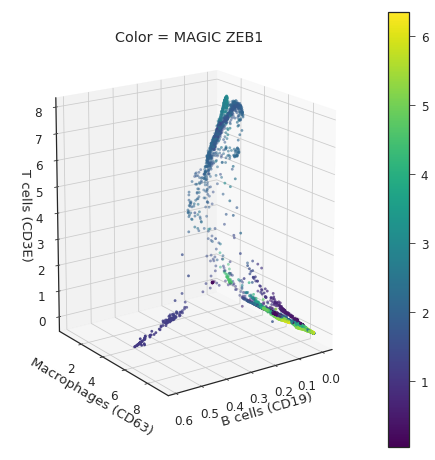

In [24]:
# After Magic
fig, ax = hnsc_sc.magic.scatter_gene_expression(['MAGIC CD19', 'MAGIC CD63', 'MAGIC CD3E'], color='MAGIC ZEB1')
ax.set_xlabel('B cells (CD19)')
ax.set_ylabel('Macrophages (CD63)')
ax.set_zlabel('T cells (CD3E)')

In [34]:
mel_sc.run_tsne()

C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:196: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


Exception: cannot handle a non-unique multi-index!

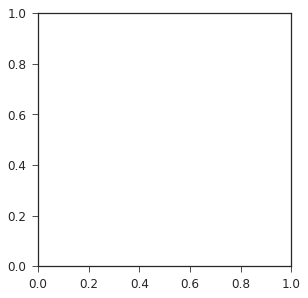

In [35]:
# Before magic
fig, ax = mel_sc.plot_gene_expression(genes=['CD19', 'CD68', 'CD163', 'CD3E'])

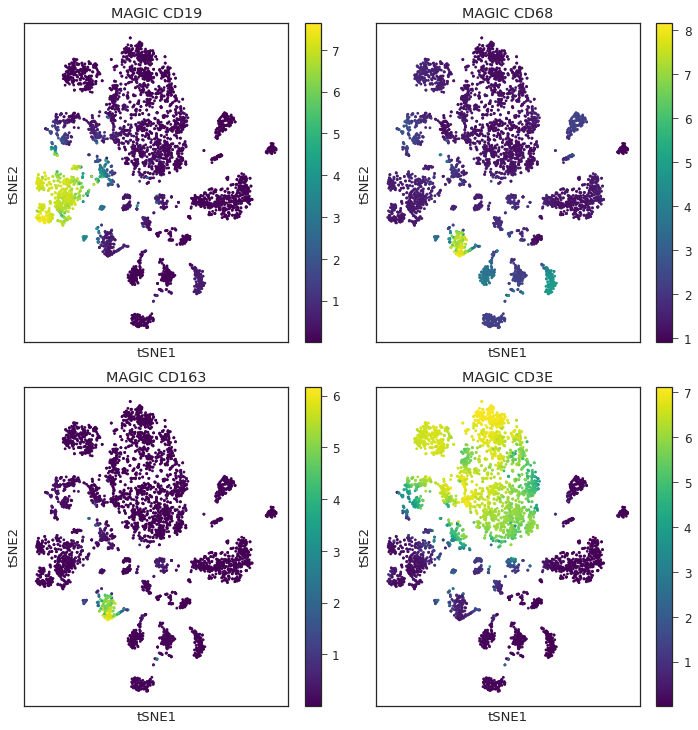

In [83]:
# After Magic
colors = {'MAGIC CD19': mel_sc.magic.data['MAGIC CD19'],
          'MAGIC CD68': mel_sc.magic.data['MAGIC CD68'],
          'MAGIC CD163': mel_sc.magic.data['MAGIC CD163'],
          'MAGIC CD3E': mel_sc.magic.data['MAGIC CD3E']}
fix, ax = mel_sc.plot_gene_expression(genes=colors)

## HNSC- Head and neck cancer

Data - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE103322 <br />
Paper - https://www.sciencedirect.com/science/article/pii/S0092867417312709?via%3Dihub

### Load Data

In [2]:
# Set Working directory
WD = 'L:/Extended M drive/ImSIg/Single cell validation/HNSC'
os.chdir(WD)
# Import data
hnsc = np.transpose(pd.read_csv('HNSCC_all_data.csv', index_col=0))
hnsc_sc = magic.mg.SCData(hnsc, 'sc-seq')

### Imputation and data trimming

In [5]:
# Run MAGIC
hnsc_sc.run_magic(n_pca_components=100, random_pca=True, t=6, k=30, 
                 ka=10, epsilon=1, rescale_percent=99)

doing PCA
Computing distances
Autotuning distances
Computing kernel
MAGIC: W_t = W^t
MAGIC: data_new = W_t * data


C:\Anaconda3\lib\site-packages\magic-0.0-py3.6.egg\magic\MAGIC_core.py:78: RuntimeWarning: invalid value encountered in true_divide


In [7]:
# Transpose and round off data
mat = np.transpose(hnsc_sc.magic.data)
mat = mat.round(2)

In [14]:
# Remove genes with zero in all cells
nonzero = mat.join(pd.DataFrame(mat.sum(axis=1)))
nonzero = nonzero[(nonzero[0] > 0)]
nonzero = nonzero.drop([0], axis=1)
# Remove the word MAGIC
clean = nonzero
clean.index = clean.index.map(lambda x: x.lstrip('MAGIC'))

### Write out imputed and trimmed data

In [22]:
clean.shape
clean.to_csv('hnsc_magic_zero_removed.csv')